**+ 程式 4-3 原始模型**

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 173us/step - loss: 0.4536 - acc: 0.8212 - val_loss: 0.3679 - val_acc: 0.8499
Epoch 2/20
25000/25000 [==============================] - 4s 154us/step - loss: 0.2570 - acc: 0.9086 - val_loss: 0.2845 - val_acc: 0.8871
Epoch 3/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.1961 - acc: 0.9283 - val_loss: 0.2855 - val_acc: 0.8860
Epoch 4/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.1638 - acc: 0.9418 - val_loss: 0.2983 - val_acc: 0.8826
Epoch 5/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.1466 - acc: 0.9484 - val_loss: 0.3137 - val_acc: 0.8800
Epoch 6/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1262 - acc: 0.9571 - val_loss: 0.3438 - val_acc: 0.8729
Epoch 7/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.1125 - acc: 0.9613 - val_loss: 0.3654 - 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23565 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39511 missing from current font.
  font.set_

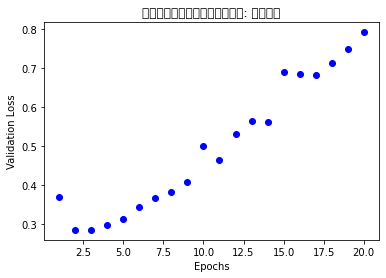

In [5]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20,batch_size=512,validation_data=(x_test,y_test))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values)+1)

plt.plot(epochs, val_loss_values, 'bo', label='Validation Loss')
plt.title('Original')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

plt.show()

**+ 程式 4-4 容量較低的模型版本**

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.6138 - acc: 0.7613 - val_loss: 0.5511 - val_acc: 0.8400
Epoch 2/20
25000/25000 [==============================] - 3s 125us/step - loss: 0.4803 - acc: 0.8705 - val_loss: 0.4499 - val_acc: 0.8599
Epoch 3/20
25000/25000 [==============================] - 3s 125us/step - loss: 0.3787 - acc: 0.8986 - val_loss: 0.3763 - val_acc: 0.8753
Epoch 4/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.3050 - acc: 0.9132 - val_loss: 0.3273 - val_acc: 0.8854
Epoch 5/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.2553 - acc: 0.9213 - val_loss: 0.3007 - val_acc: 0.8895
Epoch 6/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.2218 - acc: 0.9294 - val_loss: 0.2866 - val_acc: 0.8904
Epoch 7/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.1973 - acc: 0.9360 - val_loss: 0.2822 - 

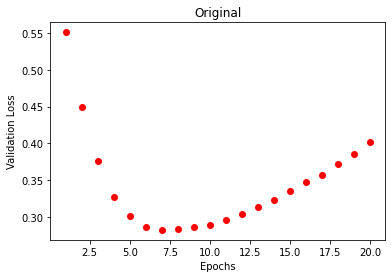

In [6]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000, ))) # 改成4個單位
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20,batch_size=512,validation_data=(x_test,y_test))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values)+1)

plt.plot(epochs, val_loss_values, 'ro', label='Validation Loss')
plt.title('Original')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

plt.show()

**+ 程式 4-5 容量較高的模型版本**

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 16s 657us/step - loss: 0.4695 - acc: 0.7921 - val_loss: 0.3032 - val_acc: 0.8738
Epoch 2/20
25000/25000 [==============================] - 16s 655us/step - loss: 0.2224 - acc: 0.9136 - val_loss: 0.3088 - val_acc: 0.8763
Epoch 3/20
25000/25000 [==============================] - 16s 646us/step - loss: 0.1313 - acc: 0.9502 - val_loss: 0.3543 - val_acc: 0.8597
Epoch 4/20
25000/25000 [==============================] - 16s 648us/step - loss: 0.0720 - acc: 0.9768 - val_loss: 0.3719 - val_acc: 0.8811
Epoch 5/20
25000/25000 [==============================] - 16s 657us/step - loss: 0.0604 - acc: 0.9881 - val_loss: 0.4287 - val_acc: 0.8805
Epoch 6/20
25000/25000 [==============================] - 16s 655us/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.6836 - val_acc: 0.8796
Epoch 7/20
25000/25000 [==============================] - 16s 642us/step - loss: 0.0347 - acc: 0.9955 - val_loss: 6.

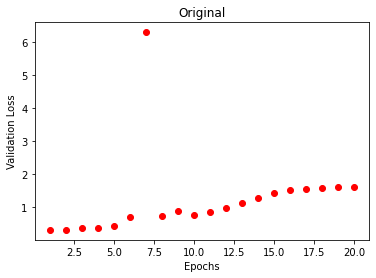

In [7]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000, ))) # 改成512個單位
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20,batch_size=512,validation_data=(x_test,y_test))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values)+1)

plt.plot(epochs, val_loss_values, 'ro', label='Validation Loss')
plt.title('Original')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

plt.show()

**+ 程式 4-6 將L2 常規化加入模型**

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.4945 - acc: 0.8266 - val_loss: 0.3865 - val_acc: 0.8704
Epoch 2/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.3195 - acc: 0.9013 - val_loss: 0.3436 - val_acc: 0.8837
Epoch 3/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.2727 - acc: 0.9190 - val_loss: 0.3278 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 3s 110us/step - loss: 0.2506 - acc: 0.9282 - val_loss: 0.3343 - val_acc: 0.8850
Epoch 5/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2395 - acc: 0.9319 - val_loss: 0.3593 - val_acc: 0.8763
Epoch 6/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2301 - acc: 0.9363 - val_loss: 0.3526 - val_acc: 0.8786
Epoch 7/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.2230 - acc: 0.9400 - val_loss: 0.3575 - 

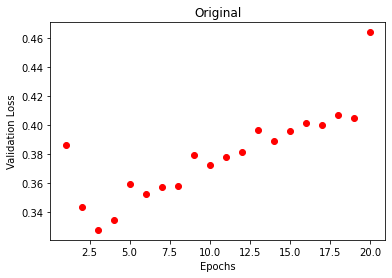

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20,batch_size=512,validation_data=(x_test,y_test))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values)+1)

plt.plot(epochs, val_loss_values, 'ro', label='Validation Loss')
plt.title('Original')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

plt.show()

**+ 程式 4-7 不同的權重嘗規化**

In [0]:
from keras import regularizers

regularizers.l1(0.001)  #L1 常規化

regularizers.l1_l2(l1=0.001, l2=0.001)  #同時使用 L1 及 L2 常規化

**+ 程式 4-8 添加Dropout**

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.5752 - acc: 0.7030 - val_loss: 0.4287 - val_acc: 0.8667
Epoch 2/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.4193 - acc: 0.8322 - val_loss: 0.3414 - val_acc: 0.8738
Epoch 3/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.3427 - acc: 0.8686 - val_loss: 0.2861 - val_acc: 0.8898
Epoch 4/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.2944 - acc: 0.8952 - val_loss: 0.2838 - val_acc: 0.8853
Epoch 5/20
25000/25000 [==============================] - 3s 110us/step - loss: 0.2569 - acc: 0.9088 - val_loss: 0.2792 - val_acc: 0.8894
Epoch 6/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.2308 - acc: 0.9178 - val_loss: 0.2885 - val_acc: 0.8896
Epoch 7/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.2093 - acc: 0.9259 - val_loss: 0.3075 - 

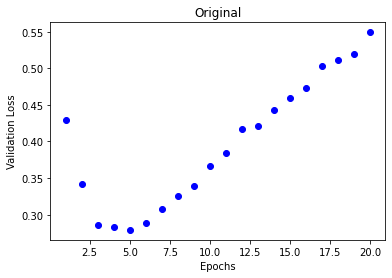

In [9]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))                                            # 增加DropOut
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))                                            # 增加DropOut
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20,batch_size=512,validation_data=(x_test,y_test))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values)+1)

plt.plot(epochs, val_loss_values, 'bo', label='Validation Loss')
plt.title('Original')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

plt.show()